Successfully loaded gimbal_mission_log.csv

Graph has been saved as gimbal_performance_plot.png


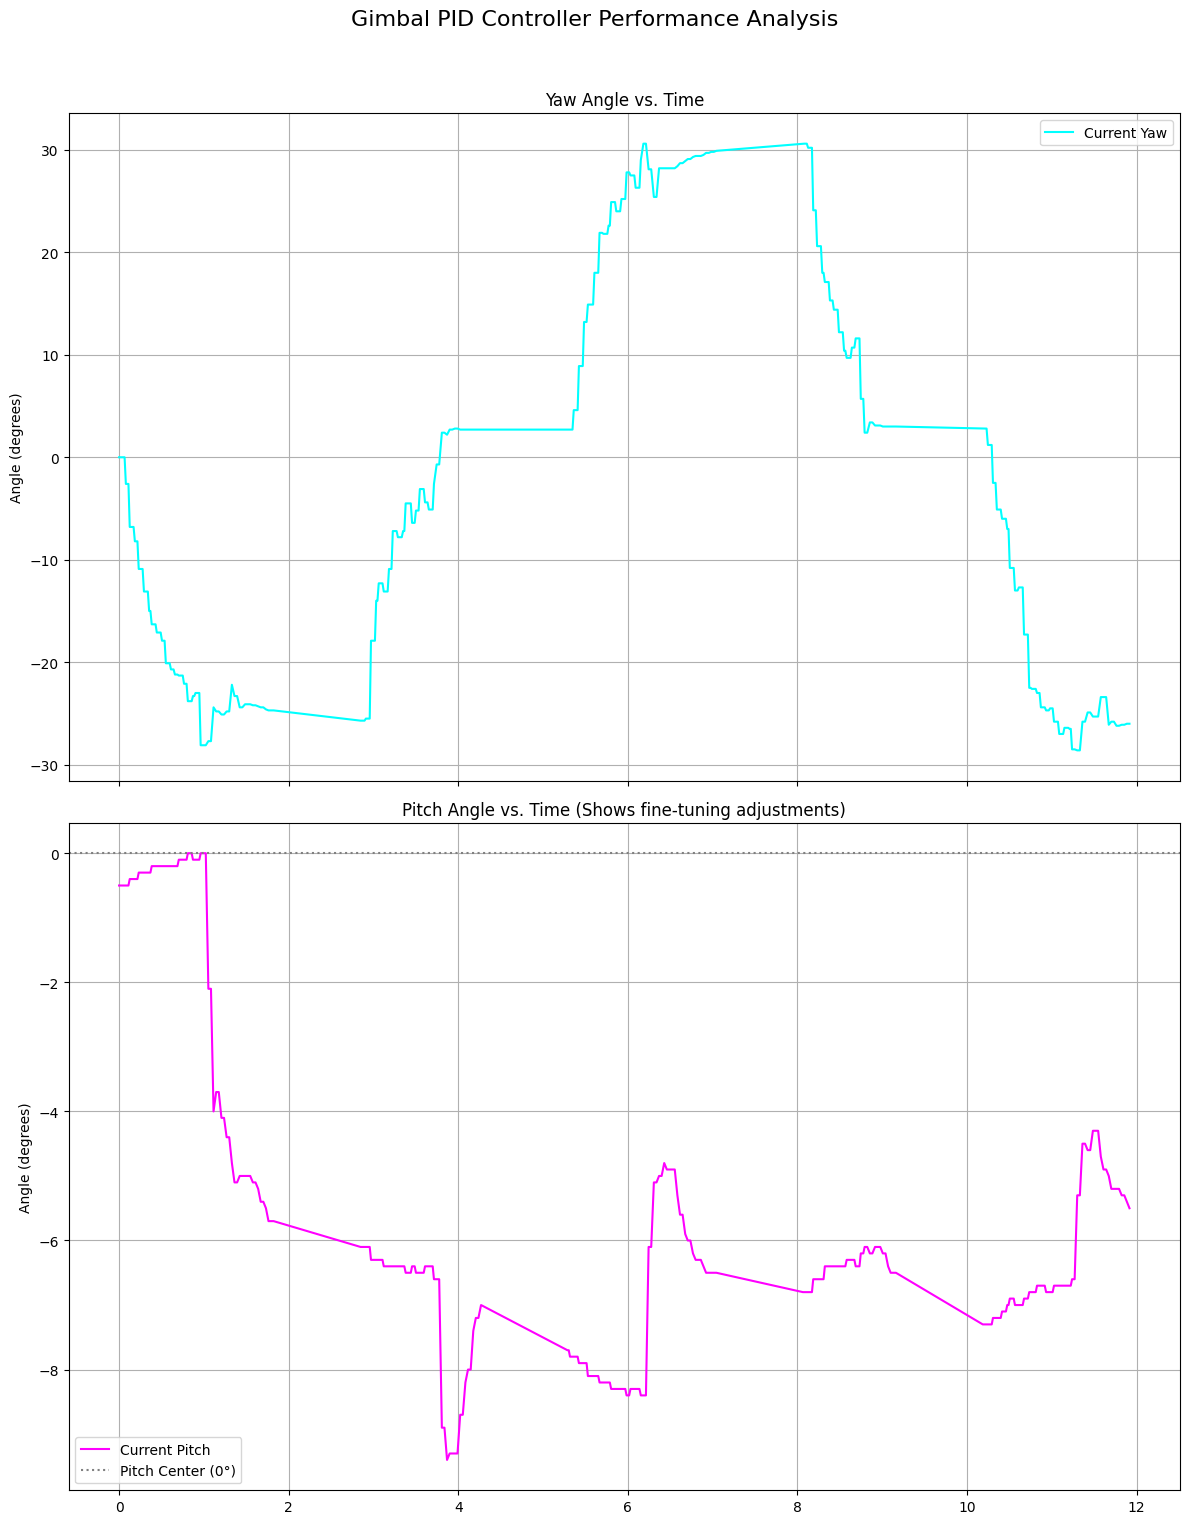

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. อ่านและเตรียมข้อมูลจากไฟล์ CSV ---
try:
    # อ่านไฟล์ CSV และแปลงคอลัมน์ที่อาจเป็นค่าว่างให้เป็นตัวเลข (NaN)
    df = pd.read_csv("gimbal_log_no_cv2.csv")
    numeric_cols = ['yaw_error', 'angle_pid_output', 'marker_error_x', 'marker_error_y', 
                    'vision_yaw_pid_output', 'vision_pitch_pid_output']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    print("Successfully loaded gimbal_mission_log.csv")
except FileNotFoundError:
    print("Error: gimbal_mission_log.csv not found. Please run the robot controller script first.")
    exit()


# --- 2. สร้างกราฟ ---
fig, axs = plt.subplots(2, 1, figsize=(12, 16), sharex=True)
fig.suptitle('Gimbal PID Controller Performance Analysis', fontsize=16)

# --- กราฟที่ 1: มุม Yaw (Coarse vs Fine-tuning) ---
axs[0].plot(df['timestamp'], df['current_yaw'], label='Current Yaw', color='cyan', zorder=2)
axs[0].set_ylabel('Angle (degrees)')
axs[0].set_title('Yaw Angle vs. Time')
axs[0].legend()
axs[0].grid(True)

# --- กราฟที่ 2: มุม Pitch (Fine-tuning) ---
# จะพล็อตเฉพาะช่วงที่มีการ fine-tuning ด้วย vision
df_fine_tune = df[df['stage'] == 'fine_tuning']
axs[1].plot(df['timestamp'], df['current_pitch'], label='Current Pitch', color='magenta', zorder=2)
axs[1].axhline(y=0, color='gray', linestyle=':', label='Pitch Center (0°)') # เส้นอ้างอิงที่ 0 องศา
axs[1].set_ylabel('Angle (degrees)')
axs[1].set_title('Pitch Angle vs. Time (Shows fine-tuning adjustments)')
axs[1].legend()
axs[1].grid(True)



# --- 3. แสดงผลและบันทึกไฟล์ ---
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig("gimbal_performance_plot.png")
print("\nGraph has been saved as gimbal_performance_plot.png")
plt.show()